In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
#get factor
def get_factors(subset_df):
    factors = {}
    for i in subset_df.columns:
        if i[:3] not in factors:
            factors[i[:3]] = []         # key가 없으면 빈 리스트 생성
        factors[i[:3]].append(i)
    return factors

In [3]:
origin_df = pd.read_csv('/content/drive/MyDrive/학부연구생/C프로젝트/C프로젝트 최종정리/first_cleaned_data.csv' )
origin_df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,5,5,4,5,5,5,4,4,5,...,5,5,4,5,4,5,5,3,4,5
1,3,1,3,2,3,3,2,1,1,1,...,1,4,4,4,3,5,4,2,5,3
2,2,3,4,2,3,4,1,3,2,1,...,5,5,2,5,4,4,5,3,4,4
3,2,4,2,3,4,4,2,2,1,2,...,4,4,5,4,3,5,4,4,3,3
4,3,3,3,3,5,3,3,1,3,2,...,5,5,5,5,5,5,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813221,4,4,4,3,4,3,3,3,3,3,...,2,4,4,3,4,4,4,2,2,4
813222,4,3,4,3,3,3,4,2,3,3,...,4,5,5,5,5,5,3,4,5,4
813223,4,4,4,3,5,5,4,4,4,2,...,5,5,5,5,4,5,5,5,4,5
813224,2,2,3,2,2,4,1,2,2,2,...,5,4,4,4,3,4,4,5,5,3


In [4]:
CTT_df= pd.read_csv('/content/drive/MyDrive/학부연구생/C프로젝트/C프로젝트 최종정리/Second_CTT_reduced_df.csv', index_col = 0 )
CTT_df

,EXT4,EXT5,EXT7,EXT2,EXT10,EST8,EST6,EST1,EST7,EST9,...,CSN1,CSN6,CSN5,CSN4,CSN9,OPN10,OPN2,OPN5,OPN1,OPN3
0,4,5,5,5,5,2,2,1,2,3,...,3,2,2,4,4,5,5,4,5,4
1,2,3,2,1,1,1,1,2,2,3,...,3,5,3,3,5,3,4,3,1,4
2,2,3,1,3,1,2,2,4,2,1,...,4,3,3,4,4,4,5,4,5,2
3,3,4,2,4,2,2,2,3,2,4,...,2,4,1,2,1,3,4,3,4,5
4,3,5,3,3,2,1,1,1,1,3,...,5,5,3,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813221,3,4,3,4,3,3,3,4,4,3,...,2,2,4,3,3,4,4,4,2,4
813222,3,3,4,3,3,4,5,4,4,4,...,3,3,3,2,2,4,5,5,4,5
813223,3,5,4,4,2,2,2,3,4,4,...,4,1,1,1,1,5,5,4,5,5
813224,2,2,1,2,2,2,4,4,2,4,...,4,4,2,4,4,3,4,3,5,4


In [5]:
Ga_df = pd.read_csv('/content/drive/MyDrive/학부연구생/C프로젝트/C프로젝트 최종정리/second_Ga_short.csv',index_col = 0)
Ga_df

,EXT1,EXT2,EXT3,EXT5,EXT9,EXT10,EST1,EST4,EST6,EST8,...,CSN5,CSN6,CSN7,CSN10,OPN2,OPN5,OPN6,OPN8,OPN9,OPN10
0,4,5,5,5,4,5,1,4,2,2,...,2,2,4,4,5,4,5,3,4,5
1,3,1,3,3,1,1,2,5,1,1,...,3,5,3,3,4,3,5,2,5,3
2,2,3,4,3,2,1,4,4,2,2,...,3,3,4,2,5,4,4,3,4,4
3,2,4,2,4,1,2,3,4,2,2,...,1,4,2,4,4,3,5,4,3,3
4,3,3,3,5,3,2,1,3,1,1,...,3,5,5,5,5,5,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813221,4,4,4,4,3,3,4,3,3,3,...,4,2,4,3,4,4,4,2,2,4
813222,4,3,4,3,3,3,4,5,5,4,...,3,3,2,3,5,5,5,4,5,4
813223,4,4,4,5,4,2,3,3,2,2,...,1,1,1,4,5,4,5,5,4,5
813224,2,2,3,2,2,2,4,4,4,2,...,2,4,4,4,4,3,4,5,5,3


In [6]:
transformers_df = pd.read_csv('/content/drive/MyDrive/학부연구생/C프로젝트/C프로젝트 최종정리/second_transformers_short.csv',index_col = 0 )
transformers_df

,AGR10,AGR2,AGR3,AGR4,AGR8,AGR9,CSN2,CSN4,CSN5,CSN7,...,EXT4,EXT5,EXT7,EXT9,OPN1,OPN10,OPN2,OPN3,OPN4,OPN6
0,4,5,4,4,4,3,2,4,2,4,...,4,5,5,4,5,5,5,4,5,5
1,3,4,5,5,4,5,4,3,3,3,...,2,3,2,1,1,3,4,4,4,5
2,3,4,5,4,4,4,4,4,3,4,...,2,3,1,2,5,4,5,2,5,4
3,4,4,3,4,4,3,2,2,1,2,...,3,4,2,1,4,3,4,5,4,5
4,3,5,5,5,5,5,5,5,3,5,...,3,5,3,3,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813221,4,4,4,5,4,4,3,3,4,4,...,3,4,3,3,2,4,4,4,3,4
813222,3,4,5,4,3,5,4,2,3,2,...,3,3,4,3,4,4,5,5,5,5
813223,5,5,1,3,4,3,1,1,1,1,...,3,5,4,4,5,5,5,5,5,5
813224,3,3,4,4,4,4,4,4,2,4,...,2,2,1,2,5,3,4,4,4,4


In [7]:
transformers_df

,AGR10,AGR2,AGR3,AGR4,AGR8,AGR9,CSN2,CSN4,CSN5,CSN7,...,EXT4,EXT5,EXT7,EXT9,OPN1,OPN10,OPN2,OPN3,OPN4,OPN6
0,4,5,4,4,4,3,2,4,2,4,...,4,5,5,4,5,5,5,4,5,5
1,3,4,5,5,4,5,4,3,3,3,...,2,3,2,1,1,3,4,4,4,5
2,3,4,5,4,4,4,4,4,3,4,...,2,3,1,2,5,4,5,2,5,4
3,4,4,3,4,4,3,2,2,1,2,...,3,4,2,1,4,3,4,5,4,5
4,3,5,5,5,5,5,5,5,3,5,...,3,5,3,3,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813221,4,4,4,5,4,4,3,3,4,4,...,3,4,3,3,2,4,4,4,3,4
813222,3,4,5,4,3,5,4,2,3,2,...,3,3,4,3,4,4,5,5,5,5
813223,5,5,1,3,4,3,1,1,1,1,...,3,5,4,4,5,5,5,5,5,5
813224,3,3,4,4,4,4,4,4,2,4,...,2,2,1,2,5,3,4,4,4,4


In [8]:
def get_sum(subset_df):
    lis = []
    corr_df  = pd.DataFrame()
    for key, value in get_factors(subset_df).items():

        corr_df[key] = subset_df[value].sum(axis = 1)
    return corr_df


In [9]:
sum_origin = get_sum(origin_df).reset_index(drop=True)
sum_origin.columns =['EXT_origin', 'EST_origin', 'AGR_origin', 'CSN_origin', 'OPN_origin']
sum_CTT = get_sum(CTT_df).reset_index(drop=True)
sum_Ga = get_sum(Ga_df).reset_index(drop=True)
sum_transformers = get_sum(transformers_df).reset_index(drop=True)[sum_CTT.columns.values]

In [10]:
CTT_corr_df = pd.concat([sum_CTT, sum_origin], axis = 1).corr()
Ga_corr_df = pd.concat([sum_Ga, sum_origin], axis = 1).corr()
transformers_corr_df = pd.concat([sum_transformers, sum_origin], axis = 1).corr()

In [11]:
transformers_corr_df

,EXT,EST,AGR,CSN,OPN,EXT_origin,EST_origin,AGR_origin,CSN_origin,OPN_origin
EXT,1.000000,-0.199130,0.301074,0.053258,0.138449,0.975972,-0.190782,0.295505,0.048645,0.139868
EST,-0.199130,1.000000,-0.070305,-0.263580,-0.074516,-0.234008,0.972320,-0.027266,-0.262296,-0.076420
AGR,0.301074,-0.070305,1.000000,0.169230,0.119437,0.311912,-0.084740,0.948290,0.174132,0.111377
CSN,0.053258,-0.263580,0.169230,1.000000,-0.048584,0.067047,-0.238958,0.138700,0.955761,-0.016315
OPN,0.138449,-0.074516,0.119437,-0.048584,1.000000,0.160644,-0.080999,0.121097,0.010353,0.948368
EXT_origin,0.975972,-0.234008,0.311912,0.067047,0.160644,1.000000,-0.226062,0.308767,0.063422,0.160646
EST_origin,-0.190782,0.972320,-0.084740,-0.238958,-0.080999,-0.226062,1.000000,-0.039884,-0.236113,-0.079531
AGR_origin,0.295505,-0.027266,0.948290,0.138700,0.121097,0.308767,-0.039884,1.000000,0.140030,0.107981
CSN_origin,0.048645,-0.262296,0.174132,0.955761,0.010353,0.063422,-0.236113,0.140030,1.000000,0.053301
OPN_origin,0.139868,-0.076420,0.111377,-0.016315,0.948368,0.160646,-0.079531,0.107981,0.053301,1.000000


In [12]:
CTT_inter_cor_df = CTT_corr_df.iloc[:5,:5]
CTT_to_oringin_df = CTT_corr_df.iloc[:5,5:]
Ga_inter_cor_df = Ga_corr_df.iloc[:5,:5]
Ga_to_oringin_df = Ga_corr_df.iloc[:5,5:]
transformers_inter_cor_df = transformers_corr_df.iloc[:5,:5]
transformers_to_oringin_df = transformers_corr_df.iloc[:5,5:]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_matrices(corr_df):
    # 두 개의 상관행렬: CTT_corr_df, IRT_corr_df (예시로 이름 지정)
    fig, axes = plt.subplots(1, 2, figsize=(22, 10))  # 1행 2열, 큰 그림 설정

    # 첫 번째 히트맵
    sns.heatmap(corr_df.iloc[5:,5:], annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1, ax=axes[0])
    axes[0].set_title('Pattern of Intercorrelation Among Original Scales', fontsize=18, pad=20)
    axes[0].xaxis.tick_top()
    axes[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # 두 번째 히트맵
    sns.heatmap(corr_df.iloc[:5,5:], annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1, ax=axes[1])
    axes[1].set_title('Pattern of Correlations Between Original and Short-Form Scales', fontsize=18, pad=20)
    axes[1].xaxis.tick_top()
    axes[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    plt.subplots_adjust(wspace=50)
    plt.tight_layout()
    plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrices(corr_df):
    # 두 개의 상관행렬: CTT_corr_df, IRT_corr_df (예시로 이름 지정)
    fig, axes = plt.subplots(1, 2, figsize=(22, 10))  # 1행 2열, 큰 그림 설정

    # 첫 번째 히트맵
    sns.heatmap(
        corr_df.iloc[5:, 5:],
        annot=True,
        annot_kws={"size": 16},  # ✅ 숫자 크기 조절
        cmap='coolwarm',
        square=True,
        vmin=-1,
        vmax=1,
        ax=axes[0]
    )
    axes[0].set_title('Pattern of Intercorrelation Among Original Scales', fontsize=18, pad=20)
    axes[0].xaxis.tick_top()
    axes[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # 두 번째 히트맵
    sns.heatmap(
        corr_df.iloc[:5, 5:],
        annot=True,
        annot_kws={"size": 16},  # ✅ 숫자 크기 조절
        cmap='coolwarm',
        square=True,
        vmin=-1,
        vmax=1,
        ax=axes[1]
    )
    axes[1].set_title('Pattern of Correlations Between Original and Short-Form Scales', fontsize=18, pad=20)
    axes[1].xaxis.tick_top()
    axes[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    plt.subplots_adjust(wspace=50)
    plt.tight_layout()
    plt.show()

In [31]:
transformers_corr_df.index = ['EXT', 'EST', 'AGR', 'CSN', 'OPN', 'EXT ', 'EST ',
       'AGR ', 'CSN ', 'OPN ']
transformers_corr_df.columns = ['EXT', 'EST', 'AGR', 'CSN', 'OPN', 'EXT ', 'EST ',
       'AGR ', 'CSN ', 'OPN ']

In [32]:
transformers_corr_df

,EXT,EST,AGR,CSN,OPN,EXT,EST,AGR,CSN,OPN
EXT,1.000000,-0.199130,0.301074,0.053258,0.138449,0.975972,-0.190782,0.295505,0.048645,0.139868
EST,-0.199130,1.000000,-0.070305,-0.263580,-0.074516,-0.234008,0.972320,-0.027266,-0.262296,-0.076420
AGR,0.301074,-0.070305,1.000000,0.169230,0.119437,0.311912,-0.084740,0.948290,0.174132,0.111377
CSN,0.053258,-0.263580,0.169230,1.000000,-0.048584,0.067047,-0.238958,0.138700,0.955761,-0.016315
OPN,0.138449,-0.074516,0.119437,-0.048584,1.000000,0.160644,-0.080999,0.121097,0.010353,0.948368
EXT,0.975972,-0.234008,0.311912,0.067047,0.160644,1.000000,-0.226062,0.308767,0.063422,0.160646
EST,-0.190782,0.972320,-0.084740,-0.238958,-0.080999,-0.226062,1.000000,-0.039884,-0.236113,-0.079531
AGR,0.295505,-0.027266,0.948290,0.138700,0.121097,0.308767,-0.039884,1.000000,0.140030,0.107981
CSN,0.048645,-0.262296,0.174132,0.955761,0.010353,0.063422,-0.236113,0.140030,1.000000,0.053301
OPN,0.139868,-0.076420,0.111377,-0.016315,0.948368,0.160646,-0.079531,0.107981,0.053301,1.000000


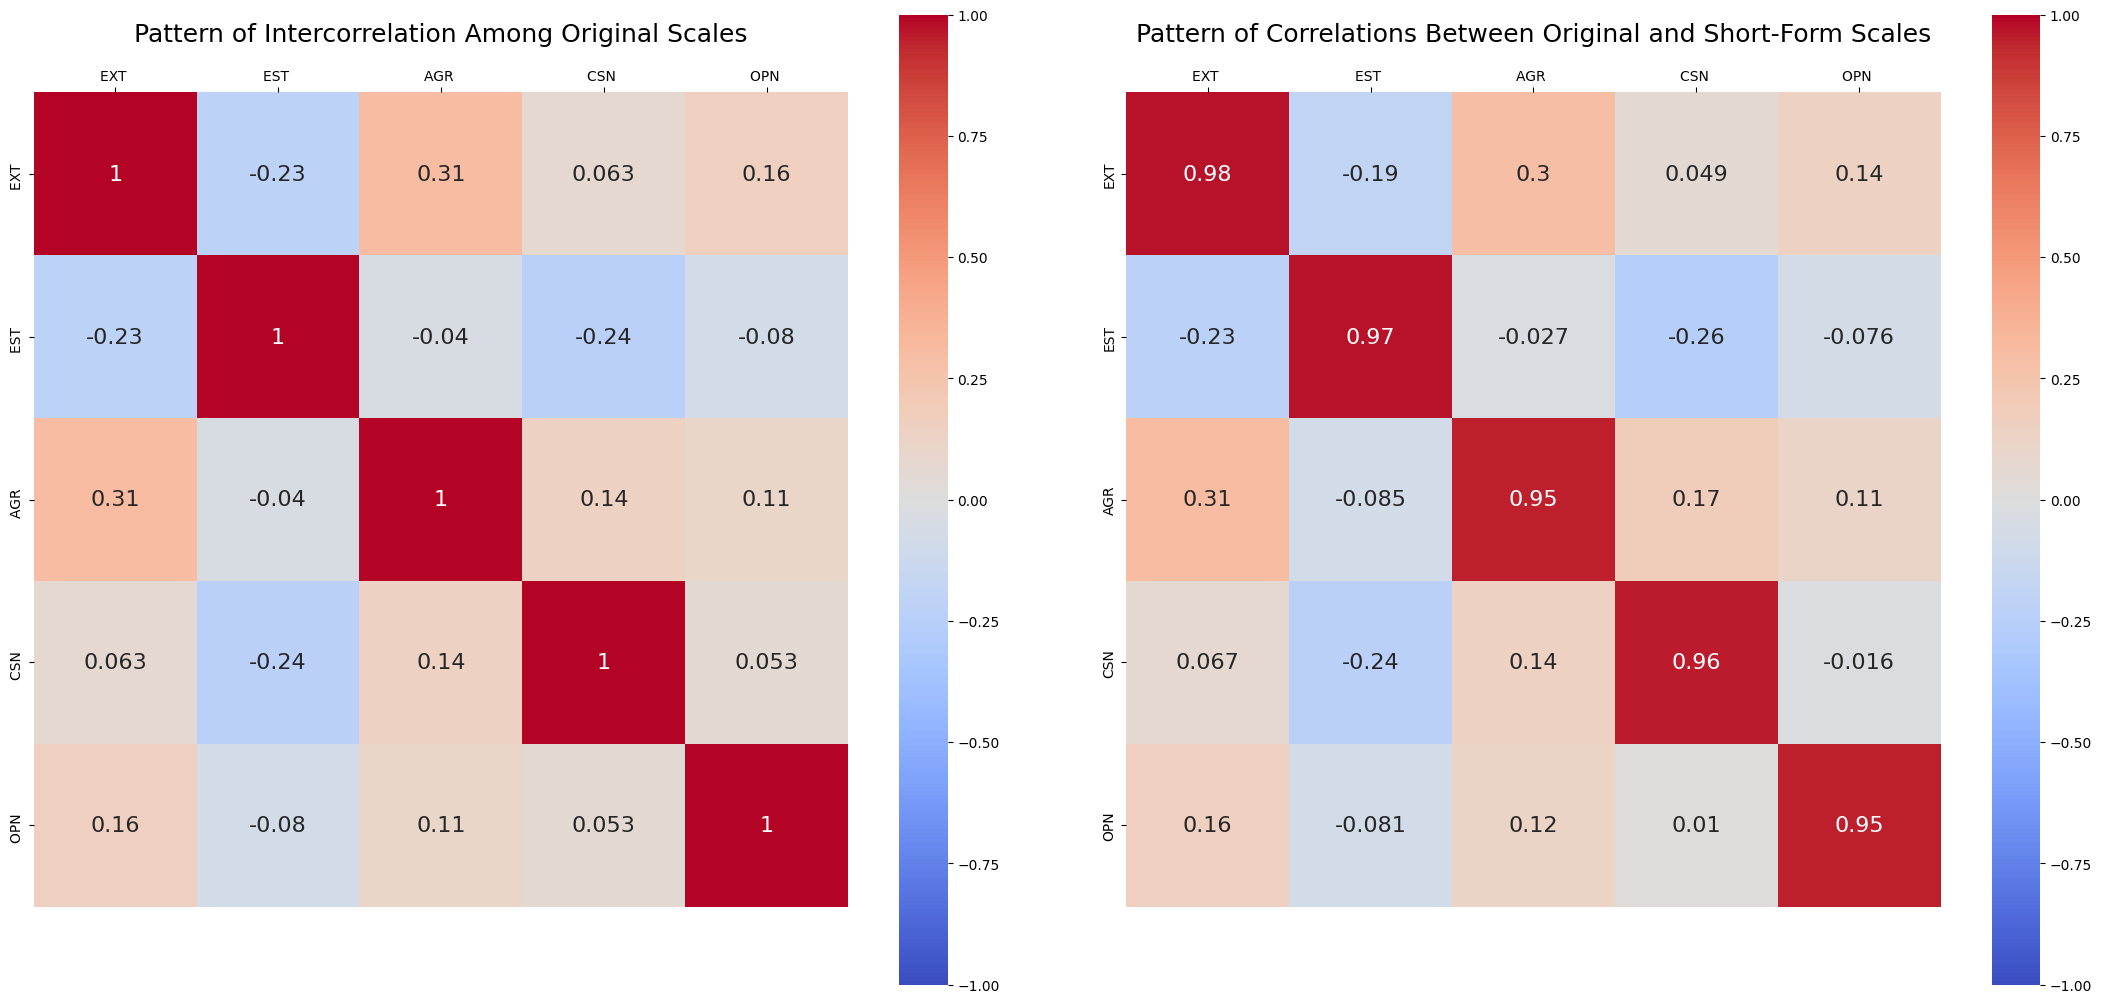

In [33]:
plot_correlation_matrices(transformers_corr_df)

In [ ]:
def convergent_r(df):
    lis = []
    for i in range(5):
        lis.append(df.iloc[i,i])
    lis.append(np.mean(lis))
    index = ['EXT', 'EST', 'AGR', 'CSN', 'OPN', 'Total']
    dataframe = pd.DataFrame(lis)
    dataframe.index = index
    return dataframe

In [ ]:
CTT_result= convergent_r(CTT_to_oringin_df)
round(CTT_result, 2 )

,0
EXT,0.96
EST,0.94
AGR,0.93
CSN,0.95
OPN,0.94
Total,0.94


In [ ]:
Ga_result = convergent_r(Ga_to_oringin_df)
round(Ga_result, 2 )

,0
EXT,0.98
EST,0.97
AGR,0.96
CSN,0.96
OPN,0.96
Total,0.97


In [ ]:
Transformers_result= convergent_r(transformers_to_oringin_df)
round(Transformers_result, 2)

,0
EXT,0.98
EST,0.97
AGR,0.95
CSN,0.96
OPN,0.95
Total,0.96


# 설명 계수 그래프 만들기

In [ ]:
transformers_r = convergent_r(transformers_to_oringin_df)

In [ ]:
r2scores =(transformers_r * transformers_r).values

In [ ]:
sum_df  = pd.concat([sum_origin, sum_transformers], axis =1 )
ext_sum_df = sum_df[['EXT_origin','EXT']]
est_sum_df = sum_df[['EST_origin','EST']]
agr_sum_df = sum_df[['AGR_origin','AGR']]
csn_sum_df = sum_df[['CSN_origin','CSN']]
opn_sum_df = sum_df[['OPN_origin','OPN']]

In [ ]:
sum_origin

,EXT_origin,EST_origin,AGR_origin,CSN_origin,OPN_origin
0,46,24,39,32,45
1,20,25,44,37,35
2,25,26,42,34,41
3,26,29,38,25,39
4,29,19,46,48,48
...,...,...,...,...,...
813221,34,33,38,31,33
813222,32,44,39,28,45
813223,39,29,35,19,48
813224,22,35,37,38,41


In [ ]:
sum_transformers

,EXT,EST,AGR,CSN,OPN
0,27,13,24,20,29
1,12,14,26,21,21
2,13,17,24,23,25
3,16,17,22,11,25
4,20,9,28,28,30
...,...,...,...,...,...
813221,21,21,25,21,21
813222,20,28,24,16,28
813223,24,15,21,7,30
813224,11,22,22,22,24


In [ ]:
r2scores[0][0]

np.float64(0.9525215608485008)

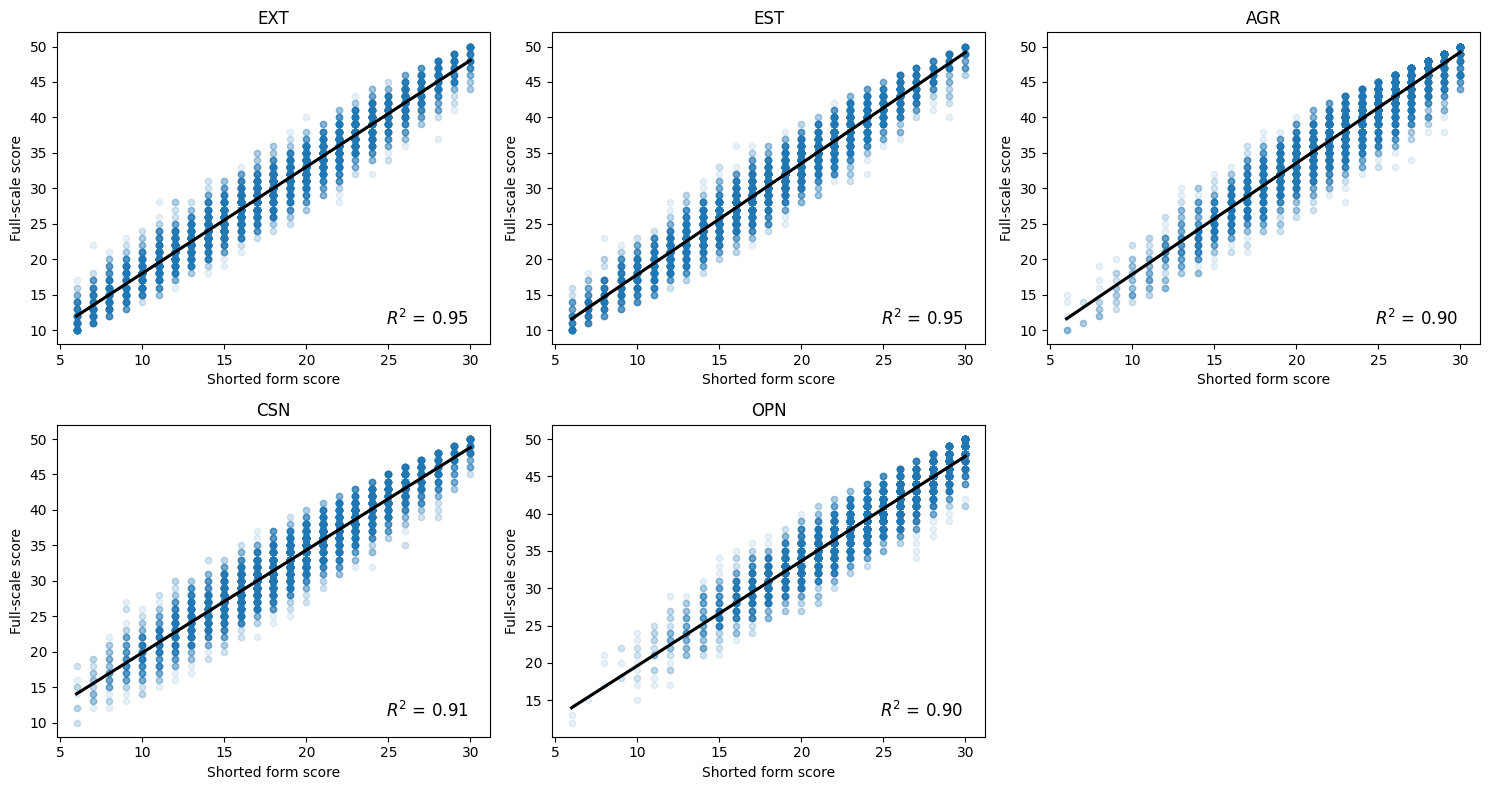

In [ ]:
scales = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']  # 원하는 순서대로
n_plots = len(scales)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2행 3열
axes = axes.flatten()  # 1차원 배열로 바꿔서 index로 접근하기 쉽게

for i, scale in enumerate(scales):
    ax = axes[i]
    x = sum_df[f'{scale}']
    y = sum_df[f'{scale}_origin']
    #샘플 1만개만 뽑기
    df_xy = sum_df[[f'{scale}', f'{scale}_origin']].dropna()
    df_xy = df_xy[(x > 2) & (y > 2)]
    df_sample = df_xy.sample(n=10000, random_state=42)  # 여기가 핵심
    x = df_sample[f'{scale}']
    y = df_sample[f'{scale}_origin']

    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 20, 'alpha': 0.1}, line_kws={'color': 'black'})
    r2 = r2scores[i][0]
    ax.set_title(f'{scale}')
    ax.set_xlabel('Shorted form score')
    ax.set_ylabel('Full-scale score')
    ax.text(0.95, 0.05,
        f'$R^2$ = {r2:.2f}',
        transform=ax.transAxes,
        verticalalignment='bottom',
        horizontalalignment='right',
        fontsize=12)

# 마지막 빈 plot 숨기기 (5개만 그리고 6칸이니까)
if n_plots < len(axes):
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])  # 혹은 axes[j].axis('off')

plt.tight_layout()
plt.show()